<a href="https://colab.research.google.com/github/MarcusASCruz/Exploratory-Correlation-Analysis-and-IA-Modeling-Evaluation/blob/main/GitHub_MaxiCorrLAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Adicionado: pandas é necessário para manipulação de DataFrames
from google.colab import drive



Mounted at /content/drive


In [ ]:
# Se os dados estiverem na pasta 'data/' do seu repositório

df = pd.read_csv('data/seu_arquivo.csv')

# 3. Leitura e conferência inicial dos dados
df = pd.read_csv(CAMINHO_ARQUIVO, sep=',') # Adicionado: separador ;

print("Primeiras linhas do arquivo lido:")
print(df.head())

print("\nEstatística descritiva de todas as variáveis numéricas:")
print(df.describe(include=[np.number]))

print("\nQuantidade de valores não nulos por coluna:")
print(df.notnull().sum())

print("\nTipos de dados das colunas:")
print(df.dtypes)

Primeiras linhas do arquivo lido:
    prAltoSF  prCorrente      prRas  prCarinhana  prVerdeGrande  prTresMarias  \
0  10.341197    4.827265   9.118931     1.208533       0.000000      8.294931   
1   8.246864    2.623066   5.520798     1.847133       0.940733      6.653798   
2   0.240333   28.867458  29.691458     2.492599      28.400525      9.208197   
3   1.593066    0.260933   9.036531     0.000000      50.813318      2.581866   
4   0.103000   22.055727  18.883328     7.340464      29.856258      3.014466   

   prParamSO  prPandPeru  prParaopeba    prPara  ...  Paracatu_Diario_SupAg  \
0   5.761132    4.531999     3.234199  1.538133  ...               23602.63   
1   5.486465    4.511399    19.501328  5.307932  ...               23602.63   
2   5.816065   17.455061     6.914731  1.737266  ...               23602.63   
3  16.658528   33.948790     0.638600  5.864132  ...               23602.63   
4  13.513596   30.460524     0.000000  2.904599  ...               23602.63   

   P

In [ ]:
# 4. Seleção da variável foco
print("\nVariáveis disponíveis nas colunas do arquivo:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

while True:
    try:
        idx = int(input('\nDigite o número correspondente à variável foco a ser estimada: '))
        var_foco = df.columns[idx]
        print(f"Variável foco selecionada: {var_foco}")
        break
    except (ValueError, IndexError):
        print("Número inválido. Tente novamente.")


Variáveis disponíveis nas colunas do arquivo:
0: prAltoSF
1: prCorrente
2: prRas
3: prCarinhana
4: prVerdeGrande
5: prTresMarias
6: prParamSO
7: prPandPeru
8: prParaopeba
9: prPara
10: prParacatu
11: prSobradinho
12: prPacuiMangai
13: prUrucuia
14: prGrande
15: prJequitai
16: prVelhas
17: etoAltoSF
18: etoCorrente
19: etoRas
20: etoCarinhana
21: etoVerdeGrande
22: etoTresMarias
23: etoParamSO
24: etoPandPeru
25: etoParaopeba
26: etoPara
27: etoParacatu
28: etoSobradinho
29: etoPacuiMangai
30: etoUrucuia
31: etoGrande
32: etoJequitai
33: etoVelhas
34: AltoSF_Diario_SupAg
35: Jequitai_Diario_SupAg
36: Para_Diario_SupAg
37: Paraopeba_Diario_SupAg
38: TMarias_Diario_SupAg
39: Velhas_Diario_SupAg
40: Carinhanha_Diario_SupAg
41: Corrente_Diario_SupAg
42: Grande_Diario_SupAg
43: PacuiMangai_Diario_SupAg
44: PandeirosPeruacu_Diario_SupAg
45: Paracatu_Diario_SupAg
46: ParamStoOnofre_Diario_SupAg
47: Ras_Diario_SupAg
48: Sobradinho_Diario_SupAg
49: Urucuia_Diario_SupAg
50: VerdeGrande_Diario_Su

In [ ]:
# 5. Lista de variáveis características (todas exceto a foco)
carac_vars = [col for col in df.columns if col != var_foco]
print(f"\nVariáveis características identificadas ({len(carac_vars)}):")
print(carac_vars)

# 6. Parâmetros de análise
max_acum = 30 # Máximo de dias acumulados
max_intervalos = 30 # Máximo de lags a testar

# 7. Função de agregação: Média para "Q", soma para as demais
def agregador(var, serie, dias):
    if var.startswith('Q'):
        return serie.rolling(dias).mean()
    else:
        return serie.rolling(dias).sum()


Variáveis características identificadas (54):
['prAltoSF', 'prCorrente', 'prRas', 'prCarinhana', 'prVerdeGrande', 'prTresMarias', 'prParamSO', 'prPandPeru', 'prParaopeba', 'prPara', 'prParacatu', 'prSobradinho', 'prPacuiMangai', 'prUrucuia', 'prGrande', 'prJequitai', 'prVelhas', 'etoAltoSF', 'etoCorrente', 'etoRas', 'etoCarinhana', 'etoVerdeGrande', 'etoTresMarias', 'etoParamSO', 'etoPandPeru', 'etoParaopeba', 'etoPara', 'etoParacatu', 'etoSobradinho', 'etoPacuiMangai', 'etoUrucuia', 'etoGrande', 'etoJequitai', 'etoVelhas', 'AltoSF_Diario_SupAg', 'Jequitai_Diario_SupAg', 'Para_Diario_SupAg', 'Paraopeba_Diario_SupAg', 'TMarias_Diario_SupAg', 'Velhas_Diario_SupAg', 'Carinhanha_Diario_SupAg', 'Corrente_Diario_SupAg', 'Grande_Diario_SupAg', 'PacuiMangai_Diario_SupAg', 'PandeirosPeruacu_Diario_SupAg', 'Paracatu_Diario_SupAg', 'ParamStoOnofre_Diario_SupAg', 'Ras_Diario_SupAg', 'Sobradinho_Diario_SupAg', 'Urucuia_Diario_SupAg', 'VerdeGrande_Diario_SupAg', 'QPirapora', 'QPontExtr', 'QBoquAflu

In [ ]:
# 8. Dicionário para guardar resultados
todos_resultados = {} # {dias_acum: {var: {'lag_otimo':..., 'corr_max':...}}}

# 9. Loop de análise
print("\nIniciando o cálculo das correlações. Isso pode levar alguns minutos...")
for dias_acum in range(1, max_acum+1):
    resultados_dias = {}
    for var in carac_vars:
        melhor_corr = None
        melhor_lag = None
        serie_agregada = agregador(var, df[var], dias_acum)
        for k in range(1, max_intervalos+1):
            lag = k * dias_acum
            acumulada_lag = serie_agregada.shift(lag)
            validos = ~acumulada_lag.isna() & ~df[var_foco].isna()
            if validos.sum() > 0:
                corr = np.corrcoef(acumulada_lag[validos], df[var_foco][validos])[0, 1]
            else:
                corr = np.nan

            if not np.isnan(corr):
                if (melhor_corr is None) or (abs(corr) > abs(melhor_corr)):
                    melhor_corr = corr
                    melhor_lag = lag
        resultados_dias[var] = {
            'lag_otimo': melhor_lag,
            'corr_max': melhor_corr,
            'corr_abs': abs(melhor_corr) if melhor_corr is not None else np.nan
        }
    todos_resultados[dias_acum] = resultados_dias
print("Cálculo das correlações concluído!")


Iniciando o cálculo das correlações. Isso pode levar alguns minutos...
Cálculo das correlações concluído!


In [ ]:
# 10. Impressão dos maiores coeficientes de correlação para cada variável e cada janela de acumulação
for dias_acum in range(1, max_acum+1):
    bloco = []
    for var in carac_vars:
        dados = todos_resultados[dias_acum][var]
        bloco.append({
            'Janela (dias)': dias_acum,
            'Variável': var,
            'Corr. máx.': dados['corr_max'],
            'Lag ótimo (dias)': dados['lag_otimo']
        })
    bloco_ordenado = sorted(bloco, key=lambda x: abs(x['Corr. máx.']) if x['Corr. máx.'] is not None else -np.inf, reverse=True)
    print(f"\n===== MAIORES COEFICIENTES DE CORRELAÇÃO PARA {dias_acum} DIAS ACUMULADOS =====")
    print("Janela (dias) | Variável".ljust(32), "Corr. máx.".ljust(12), "Lag ótimo (dias)".ljust(18))
    for linha in bloco_ordenado:
        print(f"{str(linha['Janela (dias)']).ljust(13)} | {linha['Variável'].ljust(18)} {str(np.round(linha['Corr. máx.'],4)).ljust(12)} {str(linha['Lag ótimo (dias)']).ljust(18)}")


===== MAIORES COEFICIENTES DE CORRELAÇÃO PARA 1 DIAS ACUMULADOS =====
Janela (dias) | Variável         Corr. máx.   Lag ótimo (dias)  
1             | QPontExtr          0.8687       11                
1             | QBoquAflu          0.8061       6                 
1             | QPirapora          0.6981       16                
1             | ParamStoOnofre_Diario_SupAg 0.5287       1                 
1             | Grande_Diario_SupAg 0.451        1                 
1             | Ras_Diario_SupAg   0.4488       1                 
1             | PacuiMangai_Diario_SupAg 0.4353       1                 
1             | PandeirosPeruacu_Diario_SupAg 0.4185       1                 
1             | prTresMarias       0.4054       17                
1             | prPandPeru         0.3935       30                
1             | prPacuiMangai      0.3859       30                
1             | prParacatu         0.3826       17                
1             | prJequitai       

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# 1. Collect and structure the data for the heatmap
plot_data = []
for dias_acum, vars_data in todos_resultados.items():
    for var_name, data_metrics in vars_data.items():
        corr_max_val = data_metrics.get('corr_max')
        plot_data.append({
            'Window (days)': dias_acum,
            'Variable': var_name,
            'Max Corr.': corr_max_val,
            'Optimal Lag (days)': data_metrics.get('lag_otimo')
        })

df_plot = pd.DataFrame(plot_data)

# Pivot the DataFrame for the heatmap format
df_heatmap = df_plot.pivot_table(
    index='Window (days)',
    columns='Variable',
    values='Max Corr.'
)

# Ensure the 'Window (days)' are sorted from smallest to largest
df_heatmap = df_heatmap.sort_index(ascending=True)

# Order the variables by mean correlation value
mean_correlations = df_heatmap.mean(axis=0).sort_values()
ordered_col_names = mean_correlations.index.tolist()
df_heatmap_ordered = df_heatmap[ordered_col_names]

# 2. Create the interactive heatmap with Plotly Express

# Define a custom color scale
custom_color_scale = [
    'darkviolet',  # Strong negative
    'red',
    'indianred',
    'lightcoral',  # Near zero negative
    'white',       # Zero correlation
    'lightskyblue',# Near zero positive
    'cadetblue',
    'green',
    'darkgreen'    # Strong positive
]

fig = px.imshow(
    df_heatmap_ordered,
    labels={
        "x": "Variable",
        "y": "Accumulation Window (days)",
        "color": "Maximum Correlation"
    },
    x=df_heatmap_ordered.columns,
    y=df_heatmap_ordered.index.astype(str),
    color_continuous_scale=custom_color_scale,
    color_continuous_midpoint=0,
    title="Heatmap of Maximum Correlation by Variable and Accumulation Window (Variables Ordered by Mean)",
    aspect="auto",
    origin='lower'
)

# Improve visualization
fig.update_layout(
    xaxis_title="Variable",
    yaxis_title="Accumulation Window (days)",
    xaxis_tickangle=-90,
    yaxis_type='category',
    xaxis_type='category',

    font=dict(size=18),
    xaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title_font=dict(size=20),
        tickfont=dict(size=14)
    ),
    title_font=dict(size=22),

    width=len(df_heatmap_ordered.columns) * 40,
    height=len(df_heatmap_ordered.index) * 30 + 250,

    margin=dict(l=80, r=80, b=180, t=80)
)

# Increase font size for color legend (colorbar)
fig.update_coloraxes(
    colorbar=dict(
        title="Maximum Correlation",
        title_font=dict(size=18),
        tickfont=dict(size=14)
    )
)

# Update hovertemplate
fig.update_traces(
    hovertemplate="<b>Variable</b>: %{x}<br>" +
                  "<b>Window (days)</b>: %{y}<br>" +
                  "<b>Max Corr.</b>: %{z:.4f}<extra></extra>"
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. DEFINA A JANELA DE ACÚMULO QUE VOCÊ DESEJA ANALISAR ---
# Altere o valor de 'janela_escolhida' para a janela de dias específica.
# Exemplo: Se você quer ver o heatmap para a janela de 10 dias, defina como 10.

janela_escolhida =  30 # <--- ALtere este valor para a janela de dias desejada!

# 2. Coletar e estruturar os dados *filtrados* para o novo Heatmap
plot_data_filtered = []
for dias_acum, vars_data in todos_resultados.items():
    if dias_acum == janela_escolhida: # Filtra os dados pela janela de acúmulo escolhida
        for var_name, data_metrics in vars_data.items():
            corr_max_val = data_metrics.get('corr_max')
            lag_otimo_val = data_metrics.get('lag_otimo')

            # Incluir apenas se Corr. máx. e Lag ótimo não forem nulos
            if corr_max_val is not None and lag_otimo_val is not None:
                plot_data_filtered.append({
                    'Variável': var_name,
                    'Corr. máx.': corr_max_val,
                    'Lag Ótimo': lag_otimo_val # Este será o novo eixo Y
                })
        break # Já encontramos a janela, podemos sair do loop externo

df_filtered_for_heatmap = pd.DataFrame(plot_data_filtered)

if df_filtered_for_heatmap.empty:
    print(f"Não foram encontrados dados válidos (com 'Corr. máx.' e 'Lag Ótimo') para a Janela (dias) = {janela_escolhida}.")
    print("Por favor, verifique se esta janela existe nos seus dados ou se os valores 'Corr. máx.' e 'Lag Ótimo' estão presentes e não são nulos para as variáveis nesta janela.")
else:
    # --- Preparação do DataFrame para o novo Heatmap ---
    # Pivote o DataFrame para ter 'Lag Ótimo' no índice (Y), 'Variável' nas colunas (X)
    # e 'Corr. máx.' como os valores para as cores.
    df_heatmap_lag_otimo = df_filtered_for_heatmap.pivot_table(
        index='Lag Ótimo',
        columns='Variável',
        values='Corr. máx.'
    )

    # 3. Ordenar o Eixo Y (Lag Ótimo) numericamente (1 embaixo, maior lag em cima)
    df_heatmap_lag_otimo = df_heatmap_lag_otimo.sort_index(ascending=True)

    # 4. Ordenar o Eixo X (Variáveis) pela Correlação Máxima para a janela selecionada
    # Para uma única janela, a ordenação é feita diretamente pelos valores de Corr. máx. de cada variável.
    # Garantimos que apenas as variáveis presentes no df_heatmap_lag_otimo sejam consideradas.
    variable_corr_values = df_filtered_for_heatmap.set_index('Variável')['Corr. máx.']
    # Filtra e ordena as colunas do heatmap com base nesses valores de correlação
    ordered_col_names_lag_otimo = variable_corr_values[df_heatmap_lag_otimo.columns].sort_values().index.tolist()

    df_heatmap_final_lag_otimo = df_heatmap_lag_otimo[ordered_col_names_lag_otimo]

    # 5. Criar o Heatmap interativo com Plotly Express

    # Define a mesma escala de cores personalizada do heatmap anterior
    custom_color_scale = [
        'darkviolet',  # Negativo forte
        'red',
        'indianred',
        'lightcoral',  # Negativo próximo de zero
        'white',       # Zero de correlação
        'lightskyblue',# Positivo próximo de zero
        'cadetblue',
        'green',
        'darkgreen'    # Positivo forte
    ]

    fig_lag_otimo = px.imshow(
        df_heatmap_final_lag_otimo, # Usamos o DataFrame reordenado
        labels={
            "x": "Variável",
            "y": "Lag Ótimo (dias)",
            "color": "Correlação Máxima"
        },
        x=df_heatmap_final_lag_otimo.columns,
        y=df_heatmap_final_lag_otimo.index.astype(str),
        color_continuous_scale=custom_color_scale,
        color_continuous_midpoint=0,
        title=f"Heatmap de Correlação Máxima por Variável e Lag Ótimo para Janela de Acúmulo de {janela_escolhida} Dias",
        aspect="auto",
        origin='lower' # Garante que o menor Lag Ótimo (1) esteja embaixo e os maiores no topo
    )

    # Configurações para melhorar a visualização (mantendo consistência com o anterior)
    fig_lag_otimo.update_layout(
        xaxis_title="Variável",
        yaxis_title="Lag Ótimo (dias)",
        xaxis_tickangle=-90, # Rotação de 90 graus para os rótulos do eixo X
        yaxis_type='category', # Garante que Lag Ótimo seja tratado como categorias
        xaxis_type='category', # Garante que Variável seja tratada como categorias
        font_size=8,

        # Ajusta largura e altura dinamicamente com base nos dados filtrados
        width=len(df_heatmap_final_lag_otimo.columns) * 25,
        height=len(df_heatmap_final_lag_otimo.index) * 20 + 200,

        margin=dict(l=50, r=50, b=150, t=50)
    )

    # Atualiza o hovertemplate para mostrar Lag Ótimo
    fig_lag_otimo.update_traces(
        hovertemplate="<b>Variável</b>: %{x}<br>" +
                      "<b>Lag Ótimo</b>: %{y}<br>" +
                      "<b>Corr. máx.</b>: %{z:.4f}<extra></extra>"
    )

    fig_lag_otimo.show()

In [ ]:
# 11. Tabela com os 10 melhores resultados para cada variável (blocos)
blocos_top5 = []
for var in carac_vars:
    temp = []
    for dias_acum in range(1, max_acum + 1):
        dados = todos_resultados[dias_acum][var]
        if dados['corr_max'] is not None:
            lag_intervalos = int(dados['lag_otimo'] / dias_acum) if dados['lag_otimo'] is not None and dias_acum != 0 else None
            temp.append({
                'Variável': var,
                'Coeficiente de Correlação': dados['corr_max'],
                'N dias acumulados': dias_acum,
                'Lag (n intervalos)': lag_intervalos,
                'Correlação Absoluta': abs(dados['corr_max'])
            })
    temp_top5 = sorted(temp, key=lambda x: x['Correlação Absoluta'], reverse=True)[:10]
    if temp_top5:
        bloco = {
            'top5': temp_top5,
            'maior_abs': temp_top5[0]['Correlação Absoluta']
        }
        blocos_top5.append(bloco)

blocos_top5 = sorted(blocos_top5, key=lambda x: x['maior_abs'], reverse=True)

linhas_ordenadas = []
for bloco in blocos_top5:
    linhas_ordenadas.extend(bloco['top5'])

df_top5_blocos = pd.DataFrame(linhas_ordenadas)
print('\nTABELA FINAL - Blocos de 10 melhores correlações por variável, ordenados pelo maior valor de cada variável:')
print(df_top5_blocos[['Variável', 'Coeficiente de Correlação', 'N dias acumulados', 'Lag (n intervalos)']].to_string(index=False))


TABELA FINAL - Blocos de 10 melhores correlações por variável, ordenados pelo maior valor de cada variável:
                     Variável  Coeficiente de Correlação  N dias acumulados  Lag (n intervalos)
                    QPontExtr                   0.882400                  8                   1
                    QPontExtr                   0.882233                  9                   1
                    QPontExtr                   0.878469                 10                   1
                    QPontExtr                   0.877548                  7                   1
                    QPontExtr                   0.876200                  5                   2
                    QPontExtr                   0.872263                 11                   1
                    QPontExtr                   0.869850                  3                   3
                    QPontExtr                   0.869605                  2                   5
                    QPontEx


Coeficiente de correlação MÉDIO e MEDIANO das 10 melhores variáveis (por valor absoluto) para cada janela de acumulação:
 Dias acumulados  Correlacao media top10  Correlacao mediana top10
               1                0.545410                  0.449903
               2                0.561033                  0.459951
               3                0.580323                  0.496719
               4                0.597785                  0.517467
               5                0.612205                  0.539866
               6                0.623179                  0.560235
               7                0.636737                  0.578603
               8                0.648629                  0.596626
               9                0.656379                  0.609922
              10                0.664385                  0.620997
              11                0.670393                  0.632122
              12                0.676681                  0.642226
       

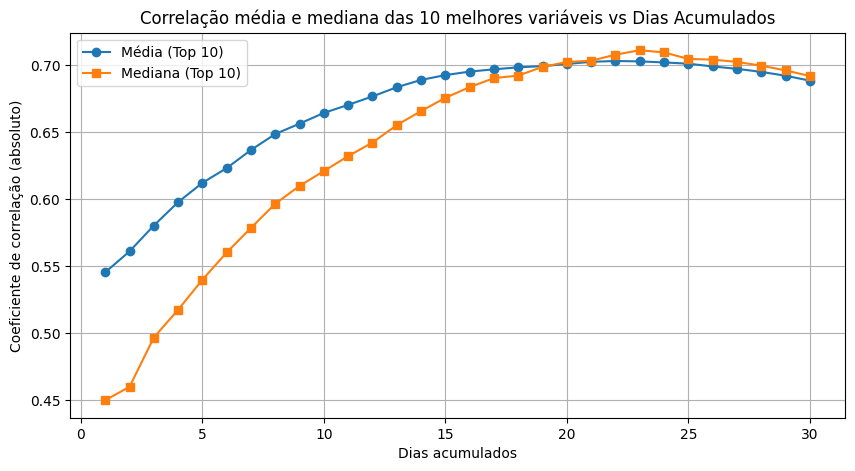

In [ ]:
# 12. Média e mediana dos 10 maiores coeficientes de correlação (absolutos) das variáveis para cada janela de acumulação
medias = []
medianas = []
for dias_acum in range(1, max_acum + 1):
    lista_corr = []
    for var in carac_vars:
        dados = todos_resultados[dias_acum][var]
        if dados['corr_max'] is not None:
            lista_corr.append((var, abs(dados['corr_max'])))
    top10 = sorted(lista_corr, key=lambda x: x[1], reverse=True)[:10]
    top10_corrs = [x[1] for x in top10]
    media = np.mean(top10_corrs) if top10_corrs else np.nan
    mediana = np.median(top10_corrs) if top10_corrs else np.nan
    medias.append({'Dias acumulados': dias_acum, 'Correlacao media top10': media})
    medianas.append({'Dias acumulados': dias_acum, 'Correlacao mediana top10': mediana})

df_medias = pd.DataFrame(medias)
df_medianas = pd.DataFrame(medianas)
df_result = df_medias.merge(df_medianas, on='Dias acumulados')

print('\nCoeficiente de correlação MÉDIO e MEDIANO das 10 melhores variáveis (por valor absoluto) para cada janela de acumulação:')
print(df_result.to_string(index=False))

plt.figure(figsize=(10,5))
plt.plot(df_result['Dias acumulados'], df_result['Correlacao media top10'], marker='o', label='Média (Top 10)')
plt.plot(df_result['Dias acumulados'], df_result['Correlacao mediana top10'], marker='s', label='Mediana (Top 10)')
plt.xlabel('Dias acumulados')
plt.ylabel('Coeficiente de correlação (absoluto)')
plt.title('Correlação média e mediana das 10 melhores variáveis vs Dias Acumulados')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# --- PRÉ-REQUISITOS (assuma que estão definidos nas células anteriores) ---
# df: DataFrame original com dados diários (inclui colunas para todas as variáveis e a variável foco).
#     Assume-se que df possui um índice sequencial (e.g., RangeIndex, Int64Index)
# var_foco: Nome da coluna da variável foco no df.
# todos_resultados: Dicionário contendo os resultados da análise de correlação (Corr_max, Lag_otimo)
#                   para cada variável em cada janela de acumulação.
# max_acum: O maior valor de janela de acumulação disponível.
# carac_vars: Uma lista com os nomes de todas as variáveis independentes.

# --- NOVA FUNÇÃO DE AGREGAÇÃO PARA O CSV FINAL ---
def agregador_para_csv_final(serie_diaria, janela_dias, metodo_agregacao='sum'):
    """
    Agrega uma série sequencial em intervalos de 'janela_dias'.
    Retorna uma nova série com um índice composto apenas pelos *últimos índices* de cada janela.
    Essa função é para a criação do CSV final com dados em intervalos de janela.

    Args:
        serie_diaria (pd.Series): Série com índice sequencial (e.g., RangeIndex).
        janela_dias (int): Tamanho da janela de acumulação.
        metodo_agregacao (str): 'sum' ou 'mean'.

    Returns:
        pd.Series: Série agregada, indexada pelos últimos índices das janelas completas.
                   Retorna uma série vazia se não houver dados suficientes.
    """
    s = serie_diaria.copy().dropna() # Remove NaNs da série antes de agrupar

    if s.empty:
        return pd.Series(dtype=float)

    aggregated_values = []
    # Agora armazenaremos os índices finais das janelas, não datas
    window_end_indices = []

    current_window_start_idx = 0
    while current_window_start_idx + janela_dias <= len(s):
        window_data = s.iloc[current_window_start_idx : current_window_start_idx + janela_dias]

        if len(window_data) == janela_dias: # Garante que a janela é completa
            if metodo_agregacao == 'sum':
                aggregated_values.append(window_data.sum())
            elif metodo_agregacao == 'mean':
                aggregated_values.append(window_data.mean())
            else:
                raise ValueError("metodo_agregacao deve ser 'sum' ou 'mean'.")

            # Adiciona o índice original do ÚLTIMO elemento da janela
            window_end_indices.append(window_data.index[-1])

        current_window_start_idx += janela_dias # Move para o início da próxima janela

    # Retorna a série agregada com o índice numérico dos finais das janelas
    return pd.Series(aggregated_values, index=window_end_indices)


# 13. EXPORTAÇÃO INTERATIVA AO FINAL
print("\n===== EXPORTAÇÃO DE DADOS =====")

salvar = input("Deseja salvar um arquivo .csv com as séries das variáveis mais correlacionadas? (s/n): ").strip().lower()
if salvar != 's':
    print("Exportação cancelada pelo usuário.")
else:
    while True:
        dias_input = input(f"Digite a janela de dias desejada para exportação (1 a {max_acum}): ")
        if dias_input.strip().isdigit():
            janela_dias = int(dias_input)
            if 1 <= janela_dias <= max_acum:
                break
            else:
                print(f"Valor fora do intervalo permitido (1 a {max_acum}).")
        else:
            print("Valor inválido. Digite um número inteiro.")

    resultados_para_janela = todos_resultados.get(janela_dias, {})

    if not resultados_para_janela:
        print(f"Não há resultados de correlação para a janela de {janela_dias} dias. Verifique 'todos_resultados'.")
    else:
        bloco_corr = []
        for var in carac_vars:
            dados = resultados_para_janela.get(var)
            if dados and dados.get('corr_max') is not None:
                bloco_corr.append({
                    'Variável': var,
                    'Corr_max_abs': abs(dados['corr_max']),
                    'Corr_max': dados['corr_max'],
                    'Lag_otimo': dados['lag_otimo']
                })

        if not bloco_corr:
            print(f"Nenhuma variável com correlação válida encontrada para a janela de {janela_dias} dias.")
        else:
            bloco_corr = sorted(bloco_corr, key=lambda x: x['Corr_max_abs'], reverse=True)[:20]

            print(f"\nTop 20 variáveis com maiores correlações absolutas para janela de {janela_dias} dias:")
            for i, item in enumerate(bloco_corr):
                print(f"{i+1}: {item['Variável']} | Corr: {np.round(item['Corr_max'], 4)}, Lag ótimo: {item['Lag_otimo']}")

            # --- Agregação da variável foco na janela escolhida ---
            # Define o método de agregação para a variável foco
            # Agora inclui 'SupAg' na condição para média
            agg_method_foco = 'mean' if var_foco.lower().startswith('q') or 'supag' in var_foco.lower() else 'sum'

            serie_foco_agregada = agregador_para_csv_final(
                df[var_foco],
                janela_dias,
                metodo_agregacao=agg_method_foco
            )

            if serie_foco_agregada.empty:
                print(f"Erro: Não foi possível agregar a variável foco '{var_foco}' para a janela de {janela_dias} dias. Verifique os dados.")
            else:
                # --- Montar DataFrame de saída com base nos intervalos de janela ---
                # O índice do df_saida será o dos índices finais das janelas da variável foco
                df_saida = pd.DataFrame(index=serie_foco_agregada.index)
                df_saida[var_foco] = serie_foco_agregada.copy() # Variável foco já agregada e alinhada

                for item in bloco_corr:
                    var = item['Variável']
                    lag_dias = item['Lag_otimo'] # lag ótimo em dias

                    # Calcula o deslocamento em termos de *intervalos* (linhas)
                    # Ex: lag_dias=15, janela_dias=5 => interval_shift = 3
                    interval_shift = round(lag_dias / janela_dias)

                    # --- NOVO: Determina o método de agregação para a variável característica atual ---
                    # Agora inclui 'SupAg' na condição para média
                    agg_method_carac = 'mean' if var.lower().startswith('q') or 'supag' in var.lower() else 'sum'

                    serie_carac_agregada = agregador_para_csv_final(
                        df[var], # Use a série diária original da característica
                        janela_dias,
                        metodo_agregacao=agg_method_carac # Usa o método determinado
                    )

                    # Deslocar a série agregada da variável característica pelo número de intervalos
                    serie_final_carac = serie_carac_agregada.shift(interval_shift)

                    nome_col = f"{var}_acum{janela_dias}_lag{lag_dias}"
                    df_saida[nome_col] = serie_final_carac

                # Ajustar DataFrame de saída: Remover linhas com NaNs no início devido aos shifts
                df_saida = df_saida.dropna(how='all')

                print("\nPrimeiras linhas do DataFrame que será salvo no CSV:")
                print(df_saida.head())

                nome_arquivo = input("\nDigite o nome do arquivo CSV de saída (com .csv no final): ")
                if not nome_arquivo.lower().endswith('.csv'):
                    nome_arquivo += '.csv'
                # CUIDADO: Ajuste o CAMINHO_SAIDA para um diretório válido no seu ambiente
                CAMINHO_SAIDA = f"/content/drive/MyDrive/GeoBSF/{nome_arquivo}" # Exemplo para Google Colab
                # Salva o CSV, incluindo o índice numérico (que representará o final de cada janela)
                df_saida.to_csv(CAMINHO_SAIDA, index=True, index_label='Fim_Janela_Indice_Original')
                print(f"\nArquivo salvo em: {CAMINHO_SAIDA}")


===== EXPORTAÇÃO DE DADOS =====
Deseja salvar um arquivo .csv com as séries das variáveis mais correlacionadas? (s/n): s
Digite a janela de dias desejada para exportação (1 a 30): 30

Top 20 variáveis com maiores correlações absolutas para janela de 30 dias:
1: prTresMarias | Corr: 0.7118, Lag ótimo: 30
2: prUrucuia | Corr: 0.7045, Lag ótimo: 30
3: prPacuiMangai | Corr: 0.7038, Lag ótimo: 30
4: prPandPeru | Corr: 0.6961, Lag ótimo: 30
5: prParacatu | Corr: 0.6941, Lag ótimo: 30
6: prJequitai | Corr: 0.6898, Lag ótimo: 30
7: prPara | Corr: 0.6758, Lag ótimo: 30
8: prVerdeGrande | Corr: 0.6722, Lag ótimo: 30
9: prAltoSF | Corr: 0.6691, Lag ótimo: 30
10: prVelhas | Corr: 0.6675, Lag ótimo: 30
11: prRas | Corr: 0.6522, Lag ótimo: 30
12: prParaopeba | Corr: 0.6511, Lag ótimo: 30
13: prCorrente | Corr: 0.6486, Lag ótimo: 30
14: prCarinhana | Corr: 0.6451, Lag ótimo: 30
15: prGrande | Corr: 0.6364, Lag ótimo: 30
16: QPontExtr | Corr: 0.601, Lag ótimo: 30
17: prParamSO | Corr: 0.6, Lag ótimo: